In [2]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/energyls/micromamba/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


In [3]:
prefix = "/mnt/c/Users/scl38887/Documents/git/"
constant = "aldehyde/workflow/subworkflows/pypsa-earth-sec/results/test_shipping_cons_3H_ws/postnetworks/elec_s_10_ec_lc1.0_Co2L0.60_3H_2030_0.15_DF_9export.nc"
ship= "aldehyde/workflow/subworkflows/pypsa-earth-sec/results/test_shipping_3H_ws/postnetworks/elec_s_10_ec_lc1.0_Co2L0.60_3H_2030_0.15_DF_9export.nc"


n_cons = pypsa.Network(prefix + constant)
n_ship = pypsa.Network(prefix + ship)

INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.60_3H_2030_0.15_DF_9export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.60_3H_2030_0.15_DF_9export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [4]:
# Check sum
# n_cons.loads_t.p["H2 export load"].sum()/1e3
# n_ship.loads_t.p["H2 export load"].sum()/1e3

Operation of Hydrogen stores

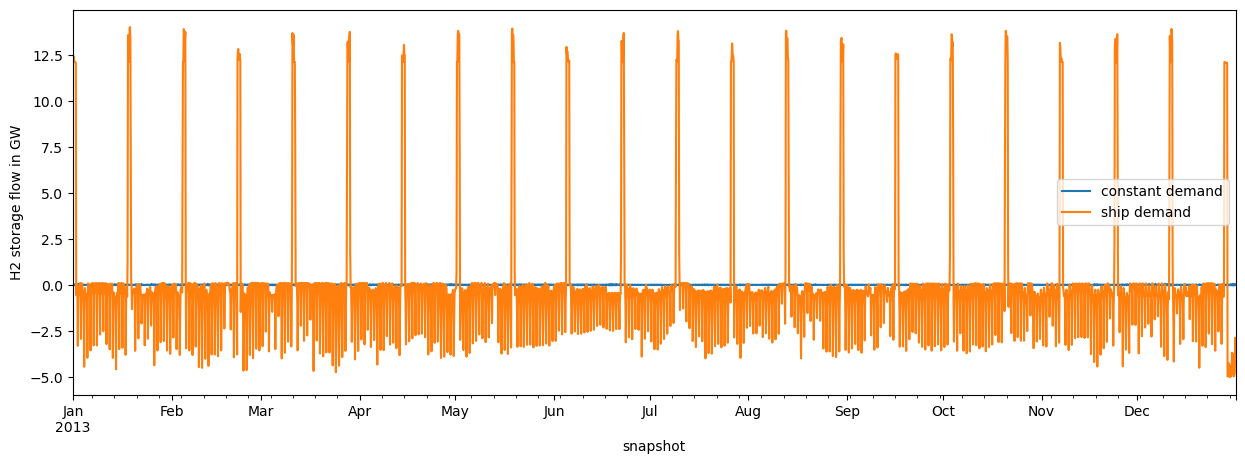

In [42]:
fig = plt.figure(figsize=(15, 5))
(n_cons.stores_t.p.loc[:, n_cons.stores[n_cons.stores.carrier == "H2"].index].sum(axis=1) / 1e3).plot(label="constant demand")  # in GW
(n_ship.stores_t.p.loc[:, n_ship.stores[n_ship.stores.carrier == "H2"].index].sum(axis=1) / 1e3).plot(label="ship demand")  # in GW
plt.ylabel("H2 storage flow in GW")
plt.legend()
plt.show()

In [35]:
# Use n.statistics() to get flows of the export bus

busname = "H2 export bus"

energy_balance = n_ship.statistics.energy_balance(
        aggregate_bus=False, aggregate_time=False
    )
    # Get the energy balance of the bus specified in busname
energy_balance_bus = energy_balance.loc[:, :, :, busname]

Export demand

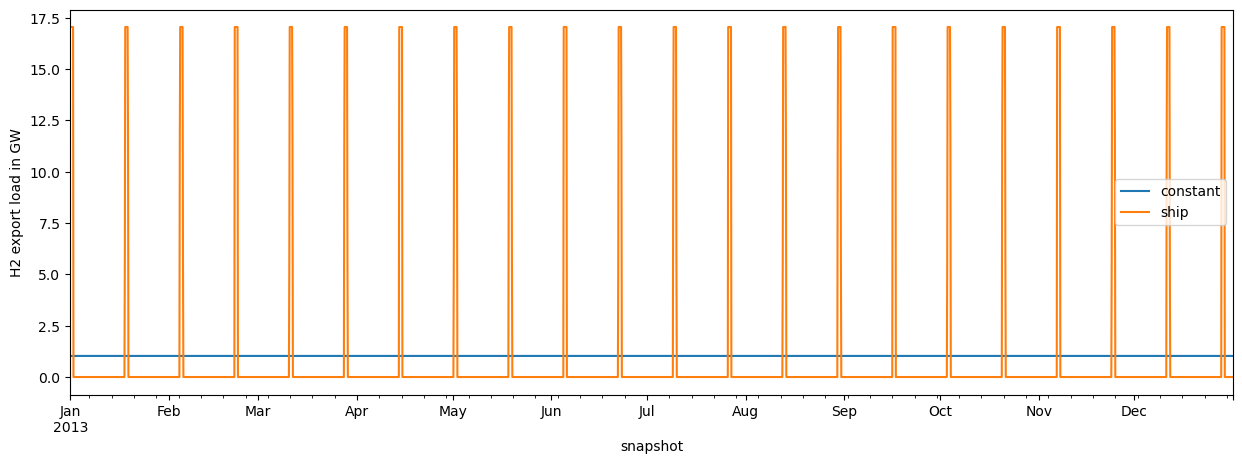

In [ ]:
fig = plt.figure(figsize=(15, 5))
(n_cons.loads_t.p["H2 export load"]/1e3).plot(label="constant")
(n_ship.loads_t.p["H2 export load"]/1e3).plot(label="ship")
plt.legend()
plt.ylabel("H2 export load in GW")
plt.show()